<a href="https://colab.research.google.com/github/Amisha2323/adamdoyle/blob/main/week13/week13_assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/depression_anxiety_data.csv")

data.shape

(783, 19)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [27]:
def analyze_column_diversity(df):
    unique_counts = df.nunique().sort_values(ascending=False)
    diversity_analysis = {
        'unique_counts': unique_counts,
        'most_diverse_column': unique_counts.index[0],
        'second_most_diverse': unique_counts.index[1],
        'unique_value_counts': unique_counts.values
    }

    return diversity_analysis

results = analyze_column_diversity(data)

print("\nNumber of unique values in each column:")
for col, count in zip(results['unique_counts'].index, results['unique_counts'].values):
    print(f"{col}: {count}")

print(f"\nMost diverse column: {results['most_diverse_column']}")
print(f"Second most diverse column: {results['second_most_diverse']}")


Number of unique values in each column:
id: 783
bmi: 516
epworth_score: 24
phq_score: 24
gad_score: 22
age: 13
who_bmi: 7
depression_severity: 6
anxiety_severity: 5
school_year: 4
anxiety_treatment: 2
anxiety_diagnosis: 2
anxiousness: 2
suicidal: 2
depression_treatment: 2
depression_diagnosis: 2
depressiveness: 2
gender: 2
sleepiness: 2

Most diverse column: id
Second most diverse column: bmi


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [28]:
def find_redundant_columns(df):
    redundant_cols = []
    for column in df.columns:
        if df[column].nunique() == 1:
            redundant_cols.append({
                'column': column,
                'value': df[column].iloc[0]
            })

    # Print results
    if redundant_cols:
        print("Found redundant columns:")
        for col in redundant_cols:
            print(f"Column '{col['column']}' has value '{col['value']}' in all rows")
    else:
        print("No redundant columns found - all columns have multiple values")
find_redundant_columns(data)

No redundant columns found - all columns have multiple values


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

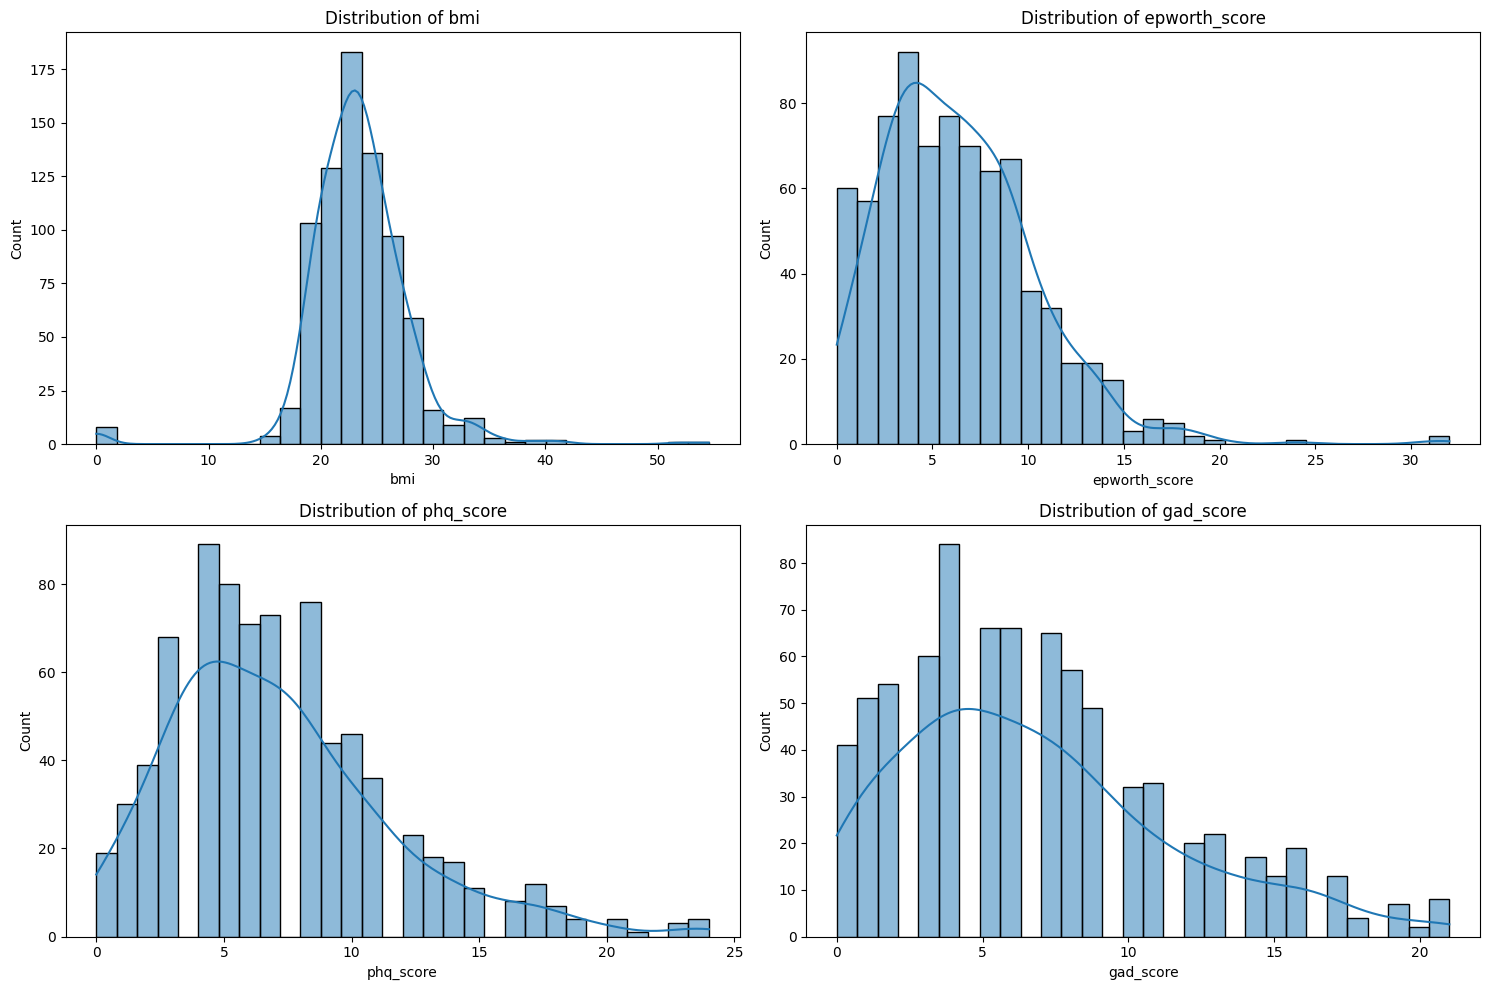

In [29]:
def plot_numeric_histograms(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['int64', 'float64']).columns

    plt.figure(figsize=(15, 10))

    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(data=df, x=column, bins=30, kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['bmi', 'epworth_score', 'phq_score', 'gad_score']
plot_numeric_histograms(data, columns_to_plot)

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

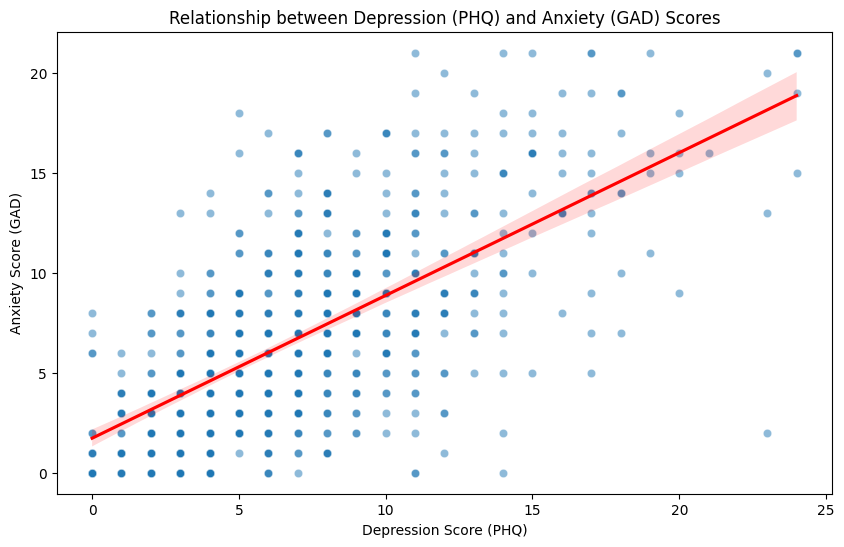

In [25]:
plt.figure(figsize=(10, 6))

# Create scatter plot with trend line
sns.scatterplot(data=data, x='phq_score', y='gad_score', alpha=0.5)
sns.regplot(data=data, x='phq_score', y='gad_score', scatter=False, color='red')

plt.title('Relationship between Depression (PHQ) and Anxiety (GAD) Scores')
plt.xlabel('Depression Score (PHQ)')
plt.ylabel('Anxiety Score (GAD)')

plt.show()



---



## Submitting Your Work

Submit your work as usual.